In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings('ignore')

mnist_path = '/media/ronit/04101CEC101CE708/UCSD Spring 2017/CSE 291/Homework2/train.csv'
mnist_df = pd.read_csv(mnist_path, header=None)

In [4]:
mnist_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42000,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
mnist_df=mnist_df.rename(index=int, columns={0: "class"})

In [6]:
mnist_df.tail()

,class,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42000,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
a=mnist_df['class']

In [8]:
del mnist_df['class']

In [9]:
mnist_df.insert(784,'class',a)

In [10]:
mnist_df.tail()

,1,2,3,4,5,6,7,8,9,10,...,776,777,778,779,780,781,782,783,784,class
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
41999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
42000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [11]:
mnist_df = mnist_df.ix[1:]

In [12]:
mnist=mnist_df.as_matrix()

In [13]:
mnist.shape

(42000, 785)

In [14]:
mnist[:5]

array([['0', '0', '0', ..., '0', '0', '1'],
       ['0', '0', '0', ..., '0', '0', '0'],
       ['0', '0', '0', ..., '0', '0', '1'],
       ['0', '0', '0', ..., '0', '0', '4'],
       ['0', '0', '0', ..., '0', '0', '0']], dtype=object)

In [14]:
#mnist_train_X=mnist[0:32000,0:784]
#mnist_train_Y=mnist[0:32000,784]
#mnist_test_X=mnist[32000:,0:784]
#mnist_test_Y=mnist[32000:,784]


In [15]:
from sklearn.model_selection import train_test_split
mnist_train_X, mnist_test_X,mnist_train_Y, mnist_test_Y = train_test_split(mnist[:,0:784],mnist[:,784], test_size=0.25, random_state=42)

In [16]:
mnist_train_X.shape

(31500, 784)

In [16]:
mnist_train_X=mnist_train_X.astype(int)
mnist_train_Y=mnist_train_Y.astype(int)
mnist_test_X=mnist_test_X.astype(int)
mnist_test_Y=mnist_test_Y.astype(int)

In [17]:
covariance=np.cov((mnist_train_X).T)

In [18]:
covariance.shape

(784, 784)

In [19]:
from numpy import linalg as LA
eig_val, eig_vec = LA.eig(covariance)

In [20]:
eig_vec=np.real(eig_vec)
eig_val=np.real(eig_val)

In [21]:
sorted_eig_val=np.sort(eig_val)[::-1]
index_sorted_eig_val=np.argsort(eig_val)[::-1]

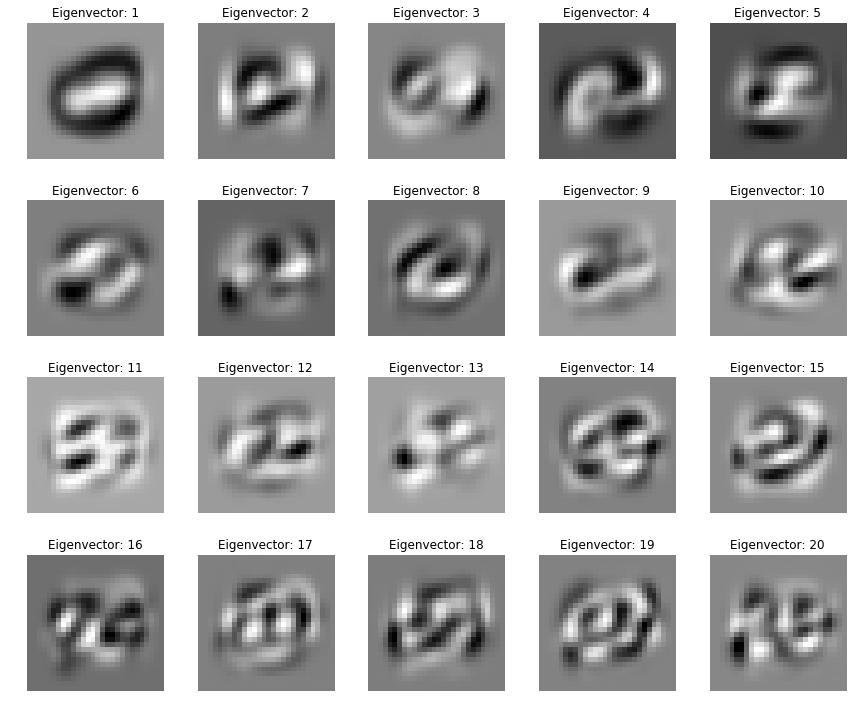

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
for i in range(20):
    example = eig_vec[:,index_sorted_eig_val[i]].reshape(28, 28).T
    plt.subplot(4, 5, i+1)
    plt.imshow(example, cmap='gray')
    plt.title("Eigenvector: {0}".format(i+1))
    plt.axis("off")
plt.tight_layout()
plt.show()

In [22]:
cumilative_sorted_eig_val=np.cumsum(sorted_eig_val)
norm_cumilative_sorted_eig_val=cumilative_sorted_eig_val/(max(cumilative_sorted_eig_val))

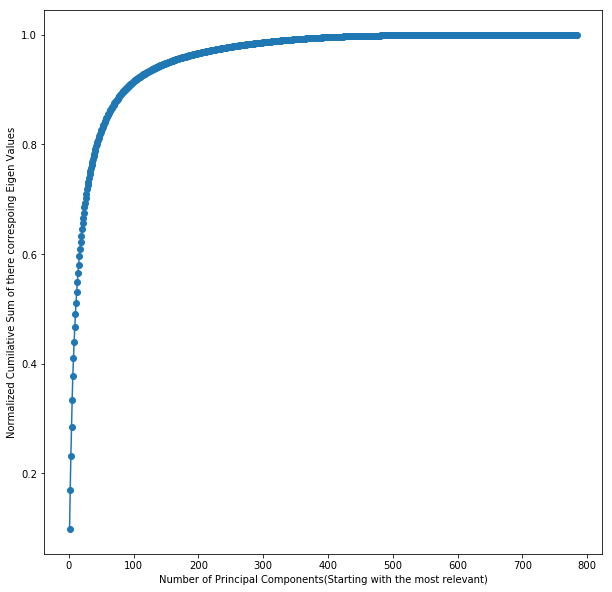

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(range(1,len(norm_cumilative_sorted_eig_val)+1), norm_cumilative_sorted_eig_val,marker='o')
plt.xlabel('Number of Principal Components(Starting with the most relevant)')
plt.ylabel('Normalized Cumilative Sum of there correspoing Eigen Values')
plt.show()

In [23]:
pca_components=eig_vec[:,index_sorted_eig_val[0]]
for i in range(len(eig_val)-1):
    pca_components=np.column_stack((pca_components,eig_vec[:,index_sorted_eig_val[i+1]]))

In [24]:
pca_components.shape

(784, 784)

In [25]:
#number_of_PCA_components
n=90;
mnist_train_X_mean=(mnist_train_X.T).mean(1)
temp=np.array([(mnist_train_X[i,:].T-mnist_train_X_mean) for i in range(len(mnist_train_X))])
mnist_train_X_classifier=temp.dot(pca_components[:,0:n])

In [26]:
mnist_train_X_classifier.shape

(31500, 90)

In [27]:
mnist_test_X_mean=(mnist_test_X.T).mean(1)
temp=np.array([(mnist_test_X[i,:].T-mnist_test_X_mean) for i in range(len(mnist_test_X))])
mnist_test_X_classifier=temp.dot(pca_components[:,0:n])

In [28]:
mnist_test_X_classifier.shape

(10500, 90)

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, zero_one_loss
from sklearn.utils import resample
from collections import defaultdict
import matplotlib.pyplot as plt
from scipy import stats

In [64]:
X={}
y={}
data_index={}
for i in [50,75,100]:
    data_index[i]=np.random.random_integers(0,len(mnist_train_X_classifier)-1, size=int((i/100)*len(mnist_train_X_classifier)))
    X[i]=mnist_train_X_classifier[data_index[i],:]
    y[i]=mnist_train_Y[data_index[i]]
    

In [31]:
len(y[50])

15750

In [30]:
from sklearn.neighbors import KNeighborsClassifier


In [33]:
sco_final_20={}
for i in [50,75,100]:
    sco=defaultdict(list)
    for k in range(1,21):
        neigh = KNeighborsClassifier(n_neighbors=k)
        for n_folds in [2,5]:
            cv = KFold(n_splits=n_folds)
            sc = cross_val_score(neigh,X[i],y[i],cv=cv)
            sco[k].append(sc.mean())
        print('k=  ',k,'  i=  ',i)    
    sco_final_20[i]=sco

k=   1   i=   50
k=   2   i=   50
k=   3   i=   50
k=   4   i=   50
k=   5   i=   50
k=   6   i=   50
k=   7   i=   50
k=   8   i=   50
k=   9   i=   50
k=   10   i=   50
k=   11   i=   50
k=   12   i=   50
k=   13   i=   50
k=   14   i=   50
k=   15   i=   50
k=   16   i=   50
k=   17   i=   50
k=   18   i=   50
k=   19   i=   50
k=   20   i=   50
k=   1   i=   75
k=   2   i=   75
k=   3   i=   75
k=   4   i=   75
k=   5   i=   75
k=   6   i=   75
k=   7   i=   75
k=   8   i=   75
k=   9   i=   75
k=   10   i=   75
k=   11   i=   75
k=   12   i=   75
k=   13   i=   75
k=   14   i=   75
k=   15   i=   75
k=   16   i=   75
k=   17   i=   75
k=   18   i=   75
k=   19   i=   75
k=   20   i=   75
k=   1   i=   100
k=   2   i=   100
k=   3   i=   100
k=   4   i=   100
k=   5   i=   100
k=   6   i=   100
k=   7   i=   100
k=   8   i=   100
k=   9   i=   100
k=   10   i=   100
k=   11   i=   100
k=   12   i=   100
k=   13   i=   100
k=   14   i=   100
k=   15   i=   100
k=   16   i=   100
k= 

In [1]:
k_val=[]
for i in range(1,21):
    k_val.append(i)
for i in range(5,21):
    k_val.append(i*5)
k_val    

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 25,
 30,
 35,
 40,
 45,
 50,
 55,
 60,
 65,
 70,
 75,
 80,
 85,
 90,
 95,
 100]

In [66]:
sco_final_loo={}
for i in [50,75,100]:
    sco=defaultdict(list)
    for k in k_val:
        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(X[i],y[i])
        sc=one_out(neigh,X[i],y[i],k)
        sco[k].append(sc)
        print('k=  ',k,'  i=  ',i)    
    sco_final_loo[i]=sco

k=   1   i=   50
k=   2   i=   50
k=   3   i=   50
k=   4   i=   50
k=   5   i=   50
k=   6   i=   50
k=   7   i=   50
k=   8   i=   50
k=   9   i=   50
k=   10   i=   50
k=   11   i=   50
k=   12   i=   50
k=   13   i=   50
k=   14   i=   50
k=   15   i=   50
k=   16   i=   50
k=   17   i=   50
k=   18   i=   50
k=   19   i=   50
k=   20   i=   50
k=   25   i=   50
k=   30   i=   50
k=   35   i=   50
k=   40   i=   50
k=   45   i=   50
k=   50   i=   50
k=   55   i=   50
k=   60   i=   50
k=   65   i=   50
k=   70   i=   50
k=   75   i=   50
k=   80   i=   50
k=   85   i=   50
k=   90   i=   50
k=   95   i=   50
k=   100   i=   50
k=   1   i=   75
k=   2   i=   75
k=   3   i=   75
k=   4   i=   75
k=   5   i=   75
k=   6   i=   75
k=   7   i=   75
k=   8   i=   75
k=   9   i=   75
k=   10   i=   75
k=   11   i=   75
k=   12   i=   75
k=   13   i=   75
k=   14   i=   75
k=   15   i=   75
k=   16   i=   75
k=   17   i=   75
k=   18   i=   75
k=   19   i=   75
k=   20   i=   75
k=   25  

In [34]:
%store -r

In [3]:
with open('/home/ronit/scores_eulidean_mnist.txt','r') as inf:
    sco_final = eval(inf.read())

In [6]:
with open('/home/ronit/scores_eulidean_mnist_20.txt','r') as inf:
    sco_final_20 = eval(inf.read())

In [13]:
with open('/home/ronit/scores_eulidean_mnist_loo.txt','r') as inf:
    sco_final_loo = eval(inf.read())

In [29]:
sco_final_loo[100][1]

[0.9872380952380952]

In [31]:
sco_final_20[100][1]

[0.973079365079365, 0.9834920634920634]

In [40]:
%store

Stored variables and their in-db values:
sco_final                 -> {50: defaultdict(<class 'list'>, {5: [0.7636772535
sco_final_20              -> {50: defaultdict(<class 'list'>, {1: [0.8319717275
sco_final_loo             -> {50: defaultdict(<class 'list'>, {1: [0.8894804479


In [8]:
final_score_2_fold={}
final_score_5_fold={}


for i in [50,75,100]:
    sco_2=[]
    sco_5=[]
    
    for k in k_val:
        
        if(k>20):
            sco_2.append(sco_final[i][k][0])
            sco_5.append(sco_final[i][k][1])
            
        else:
            
            sco_2.append(sco_final_20[i][k][0])
            sco_5.append(sco_final_20[i][k][1])
     
    
    final_score_2_fold[i]=sco_2     
    final_score_5_fold[i]=sco_5
            



In [12]:
len(final_score_5_fold[50])

36

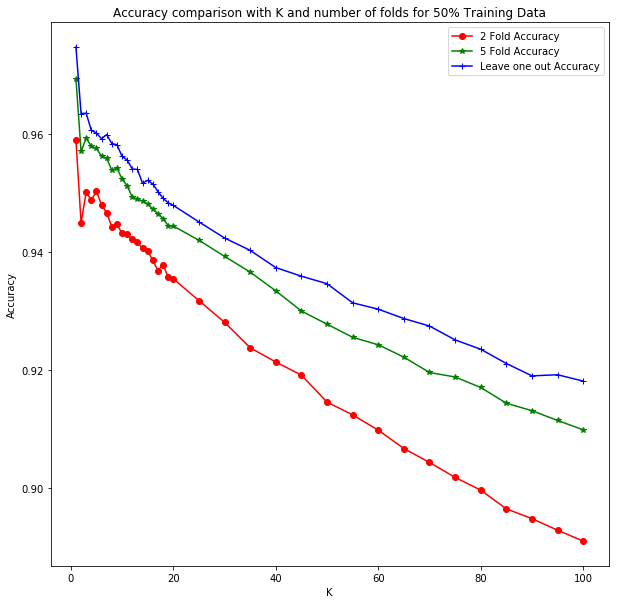

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

sco_loo=[sco_final_loo[50][i] for i in k_val]

plt.plot(k_val,final_score_2_fold[50],marker='o',color='r',label='2 Fold Accuracy')
plt.plot(k_val,final_score_5_fold[50],marker='*',color='g',label='5 Fold Accuracy')
plt.plot(k_val,sco_loo,marker='+',color='b',label='Leave one out Accuracy')



plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison with K and number of folds for 50% Training Data')
plt.legend()

plt.show()

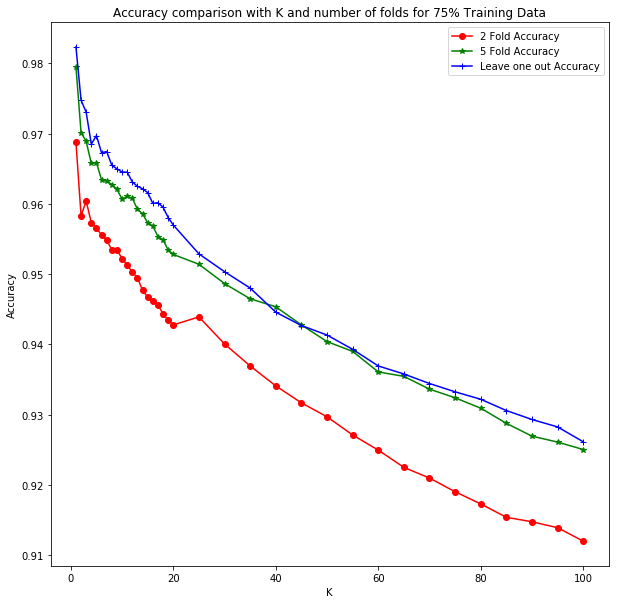

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

sco_loo=[sco_final_loo[75][i] for i in k_val]

plt.plot(k_val,final_score_2_fold[75],marker='o',color='r',label='2 Fold Accuracy')
plt.plot(k_val,final_score_5_fold[75],marker='*',color='g',label='5 Fold Accuracy')
plt.plot(k_val,sco_loo,marker='+',color='b',label='Leave one out Accuracy')



plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison with K and number of folds for 75% Training Data')
plt.legend()

plt.show()

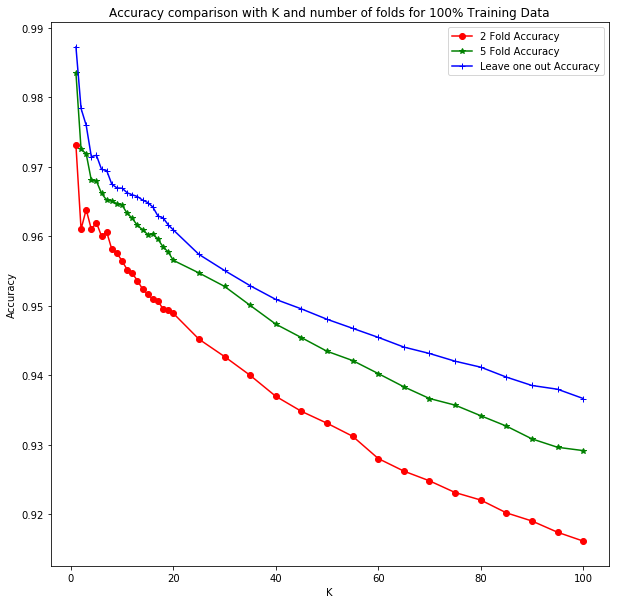

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

sco_loo=[sco_final_loo[100][i] for i in k_val]

plt.plot(k_val,final_score_2_fold[100],marker='o',color='r',label='2 Fold Accuracy')
plt.plot(k_val,final_score_5_fold[100],marker='*',color='g',label='5 Fold Accuracy')
plt.plot(k_val,sco_loo,marker='+',color='b',label='Leave one out Accuracy')



plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison with K and number of folds for 100% Training Data')
plt.legend()

plt.show()

In [73]:
from sklearn.neighbors import KNeighborsClassifier
score_test={}
for K in range(1,11):
    
    neigh = KNeighborsClassifier(n_neighbors=K)
    neigh.fit(X[100],y[100])
    score_test[K]=neigh.score(mnist_test_X_classifier,mnist_test_Y)      

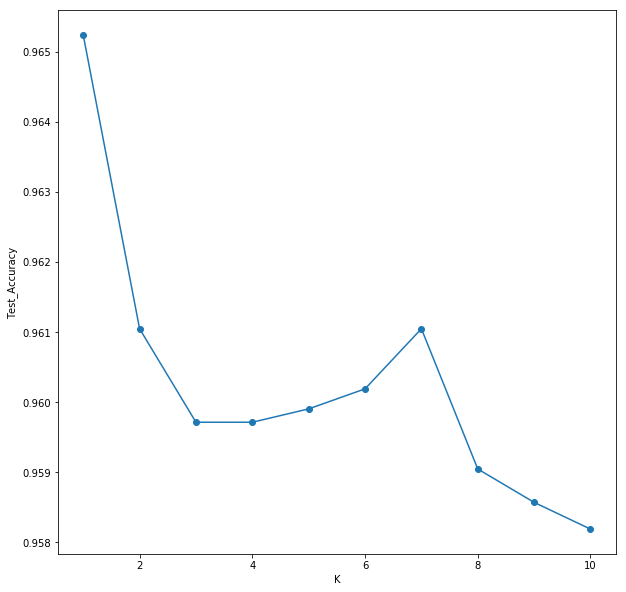

In [80]:
plt.figure(figsize=(10,10))
sco=[score_test[i] for i in range(1,11)]
plt.plot(range(1,11),sco,marker='o')
plt.xlabel('K')
plt.ylabel('Test_Accuracy')
plt.show()

In [74]:
score_test

{1: 0.96523809523809523,
 2: 0.96104761904761904,
 3: 0.95971428571428574,
 4: 0.95971428571428574,
 5: 0.95990476190476193,
 6: 0.96019047619047615,
 7: 0.96104761904761904,
 8: 0.95904761904761904,
 9: 0.95857142857142852,
 10: 0.95819047619047615}

In [67]:
sco_final_20[100][1]

[0.973079365079365, 0.9834920634920634]

In [68]:
sco_final_loo[100][1]

[0.9872380952380952]

In [ ]:
%store sco_final_20

In [67]:
sco_final_loo[50][1]


[0.9747301587301588]

In [68]:
%store sco_final_loo

Stored 'sco_final_loo' (dict)


In [69]:
%store sco_final_loo >scores_eulidean_mnist_loo.txt 

Writing 'sco_final_loo' (dict) to file 'scores_eulidean_mnist_loo.txt'.


In [37]:
%store sco_final_20 >scores_eulidean_mnist_20.txt 

Writing 'sco_final_20' (dict) to file 'scores_eulidean_mnist_20.txt'.


In [38]:
%store sco_final

Stored 'sco_final' (dict)


In [39]:
%store sco_final >scores_eulidean_mnist.txt 

Writing 'sco_final' (dict) to file 'scores_eulidean_mnist.txt'.


In [31]:
covariance=np.cov((mnist_train_X_classifier).T)

In [32]:
covariance.shape

(90, 90)

In [33]:
inv=np.linalg.pinv(covariance)
from scipy import linalg
c=linalg.sqrtm(inv)
c

array([[  1.72466974e-03,   7.29163185e-20,   3.88752312e-20, ...,
         -1.30890271e-19,   5.59770011e-18,   5.95666708e-18],
       [  7.78150555e-19,   2.02315361e-03,   2.57213654e-18, ...,
         -1.45183337e-19,   1.60523222e-18,  -1.66439978e-18],
       [  1.11249057e-19,   1.72748069e-18,   2.17034835e-03, ...,
          4.31593402e-19,   5.70917666e-19,  -6.63662827e-19],
       ..., 
       [  1.09514913e-19,  -1.31377224e-18,   1.68139043e-19, ...,
          1.53473656e-02,   1.23383577e-16,  -9.00019604e-17],
       [  5.59142029e-18,   2.08926157e-18,   1.89241462e-18, ...,
          1.27026143e-16,   1.54789482e-02,  -1.87372205e-16],
       [  5.25294776e-18,  -1.70288983e-18,  -5.28796993e-19, ...,
         -8.82543170e-17,  -1.90448318e-16,   1.56088375e-02]])

In [82]:
X={}
y={}
data_index={}
for i in [50,75,100]:
    data_index[i]=np.random.random_integers(0,len(mnist_train_X_classifier)-1, size=int((i/400)*len(mnist_train_X_classifier)))
    X[i]=mnist_train_X_classifier[data_index[i],:]
    y[i]=mnist_train_Y[data_index[i]]

In [34]:
covariance=np.cov((mnist_train_X_classifier).T)

In [35]:
covariance.shape

(90, 90)

In [36]:
inv=np.linalg.pinv(covariance)

In [86]:
from sklearn.neighbors import DistanceMetric
sco_final_mah={}
for i in [50,75,100]:
    sco=defaultdict(list)
    for k in range(1,11):
        neigh = KNeighborsClassifier(algorithm ='ball_tree',n_neighbors=k,metric='mahalanobis',metric_params={"VI":inv})
        for n_folds in [2,5]:
            cv = KFold(n_splits=n_folds)
            sc = cross_val_score(neigh,X[i],y[i],cv=cv)
            sco[k].append(sc.mean())
        print('k=  ',k,'  i=  ',i)    
    sco_final_mah[i]=sco

k=   1   i=   50
k=   2   i=   50
k=   3   i=   50
k=   4   i=   50
k=   5   i=   50
k=   6   i=   50
k=   7   i=   50
k=   8   i=   50
k=   9   i=   50
k=   10   i=   50
k=   1   i=   75
k=   2   i=   75
k=   3   i=   75
k=   4   i=   75
k=   5   i=   75
k=   6   i=   75
k=   7   i=   75
k=   8   i=   75
k=   9   i=   75
k=   10   i=   75
k=   1   i=   100
k=   2   i=   100
k=   3   i=   100
k=   4   i=   100
k=   5   i=   100
k=   6   i=   100
k=   7   i=   100
k=   8   i=   100
k=   9   i=   100
k=   10   i=   100


In [88]:
%store sco_final_mah >scores_eulidean_mnist_mah.txt 

Writing 'sco_final_mah' (dict) to file 'scores_eulidean_mnist_mah.txt'.


In [91]:
sco_final_loo_mah={}
for i in [50,75,100]:
    sco=defaultdict(list)
    for k in range(1,11):
        neigh = KNeighborsClassifier(algorithm ='ball_tree',n_neighbors=k,metric='mahalanobis',metric_params={"VI":inv})
        neigh.fit(X[i],y[i])
        sc=one_out(neigh,X[i],y[i],k)
        sco[k].append(sc)
        print('k=  ',k,'  i=  ',i)    
    sco_final_loo_mah[i]=sco

k=   1   i=   50
k=   2   i=   50
k=   3   i=   50
k=   4   i=   50
k=   5   i=   50
k=   6   i=   50
k=   7   i=   50
k=   8   i=   50
k=   9   i=   50
k=   10   i=   50
k=   1   i=   75
k=   2   i=   75
k=   3   i=   75
k=   4   i=   75
k=   5   i=   75
k=   6   i=   75
k=   7   i=   75
k=   8   i=   75
k=   9   i=   75
k=   10   i=   75
k=   1   i=   100
k=   2   i=   100
k=   3   i=   100
k=   4   i=   100
k=   5   i=   100
k=   6   i=   100
k=   7   i=   100
k=   8   i=   100
k=   9   i=   100
k=   10   i=   100


In [92]:
%store sco_final_loo_mah >scores_eulidean_mnist_mah_loo.txt 

Writing 'sco_final_loo_mah' (dict) to file 'scores_eulidean_mnist_mah_loo.txt'.


In [97]:
final_score_2_fold={}
final_score_5_fold={}


for i in [50,75,100]:
    sco_2=[]
    sco_5=[]
    
    for k in range(1,11):
        
        sco_2.append(sco_final_mah[i][k][0])
        sco_5.append(sco_final_mah[i][k][1])
            

    
    final_score_2_fold[i]=sco_2     
    final_score_5_fold[i]=sco_5

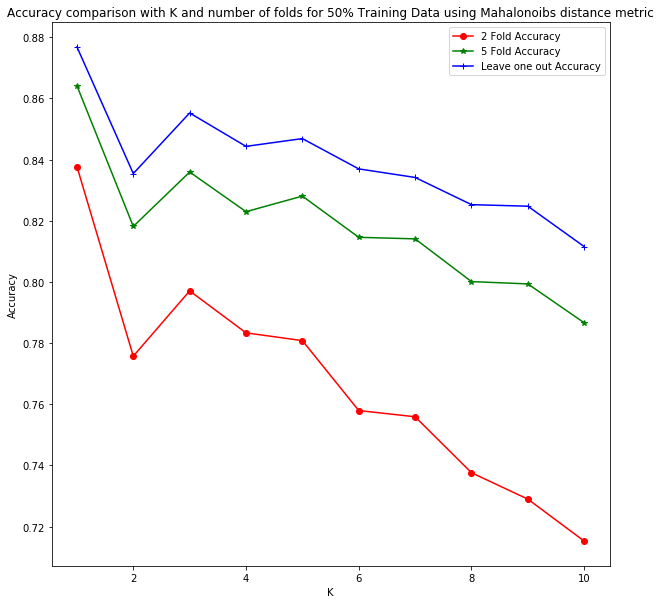

In [98]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

sco_loo=[sco_final_loo_mah[50][i] for i in range(1,11)]

plt.plot(range(1,11),final_score_2_fold[50],marker='o',color='r',label='2 Fold Accuracy')
plt.plot(range(1,11),final_score_5_fold[50],marker='*',color='g',label='5 Fold Accuracy')
plt.plot(range(1,11),sco_loo,marker='+',color='b',label='Leave one out Accuracy')



plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison with K and number of folds for 50% Training Data using Mahalonoibs distance metric')
plt.legend()

plt.show()

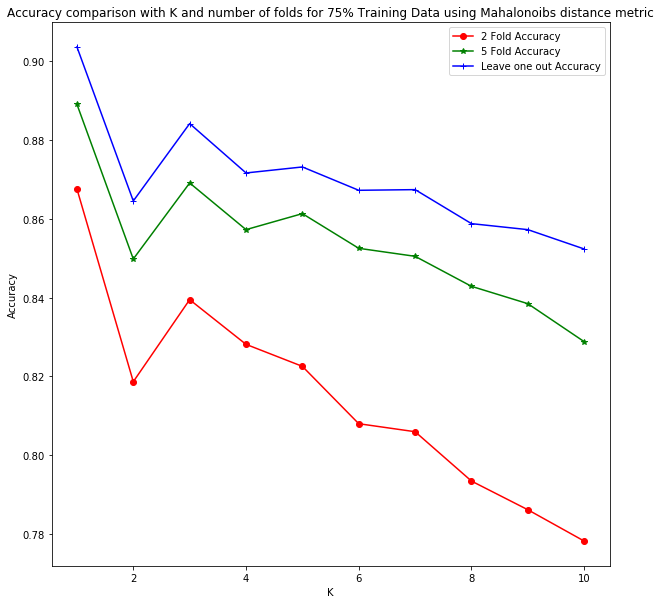

In [100]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

sco_loo=[sco_final_loo_mah[75][i] for i in range(1,11)]

plt.plot(range(1,11),final_score_2_fold[75],marker='o',color='r',label='2 Fold Accuracy')
plt.plot(range(1,11),final_score_5_fold[75],marker='*',color='g',label='5 Fold Accuracy')
plt.plot(range(1,11),sco_loo,marker='+',color='b',label='Leave one out Accuracy')



plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison with K and number of folds for 75% Training Data using Mahalonoibs distance metric')
plt.legend()

plt.show()

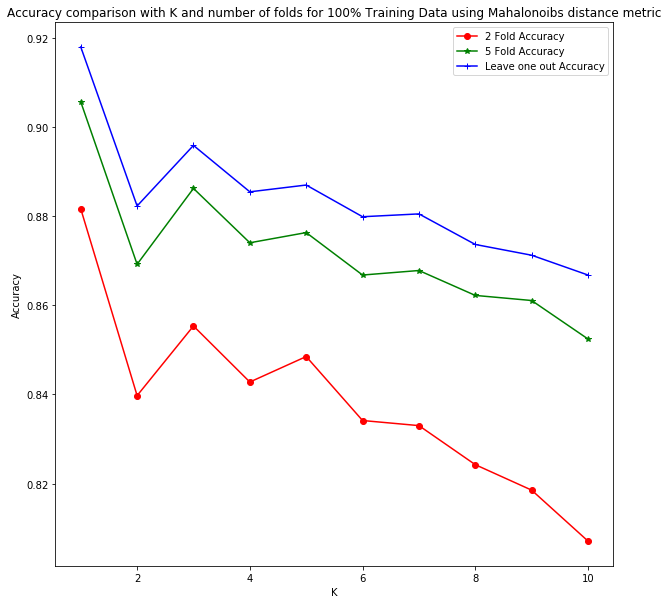

In [101]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

sco_loo=[sco_final_loo_mah[100][i] for i in range(1,11)]

plt.plot(range(1,11),final_score_2_fold[100],marker='o',color='r',label='2 Fold Accuracy')
plt.plot(range(1,11),final_score_5_fold[100],marker='*',color='g',label='5 Fold Accuracy')
plt.plot(range(1,11),sco_loo,marker='+',color='b',label='Leave one out Accuracy')



plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison with K and number of folds for 100% Training Data using Mahalonoibs distance metric')
plt.legend()

plt.show()

In [103]:
sco_final_mah[100][1]

[0.88165124324154187, 0.9056507936507936]

In [105]:
sco_final_loo_mah[100][1]

[0.917968253968254]

In [90]:
def one_out(neigh,X,y,k):
    right=0
    for i in range(len(y)):
        dist,ind=neigh.kneighbors(X[i],n_neighbors=k+2, return_distance=True)
        ind=ind[0]
        dist=dist[0]
        sort_dist_index=np.argsort(dist)
        ind_sort=[ind[j] for j in sort_dist_index]
        ind_sort=[ind_sort[g] for g in range(1,k+1)]
        a,b=stats.mode(y[ind_sort])
        if(a==y[i]):
            right=right+1
    return (right/len(y))

In [94]:
from sklearn.neighbors import KNeighborsClassifier
score_test={}
for K in range(1,11):
    
    neigh = KNeighborsClassifier(algorithm ='ball_tree',n_neighbors=K,metric='mahalanobis',metric_params={"VI":inv})
    neigh.fit(X[100],y[100])
    score_test[K]=neigh.score(mnist_test_X_classifier,mnist_test_Y) 

In [95]:
score_test

{1: 0.89428571428571424,
 2: 0.87104761904761907,
 3: 0.8828571428571429,
 4: 0.87514285714285711,
 5: 0.87609523809523815,
 6: 0.87133333333333329,
 7: 0.87,
 8: 0.8671428571428571,
 9: 0.86466666666666669,
 10: 0.8598095238095238}

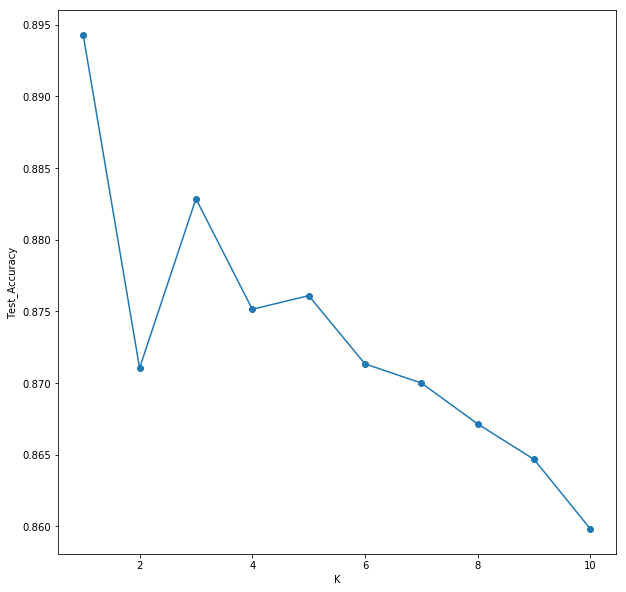

In [96]:
plt.figure(figsize=(10,10))
sco=[score_test[i] for i in range(1,11)]
plt.plot(range(1,11),sco,marker='o')
plt.xlabel('K')
plt.ylabel('Test_Accuracy')
plt.show()

In [106]:
from sklearn.neighbors import KNeighborsClassifier
score_test={}
for K in range(1,2):
    
    neigh = KNeighborsClassifier(n_neighbors=K)
    neigh.fit(X[100],y[100])
    score_test[K]=neigh.score(mnist_test_X_classifier,mnist_test_Y) 

In [107]:
score_test[1]

0.94904761904761903

In [37]:
from sklearn.neighbors import KNeighborsClassifier
score_test={}
for K in range(1,2):
    
    neigh = KNeighborsClassifier(algorithm ='ball_tree',n_neighbors=K,metric='mahalanobis',metric_params={"VI":inv})
    neigh.fit(mnist_train_X_classifier,mnist_train_Y)
    score_test[K]=neigh.score(mnist_test_X_classifier,mnist_test_Y) 

In [38]:
score_test[1]

0.94285714285714284